# Implementation of pixel-flipping algorithm

patches_nmmpp torch.Size([1, 28, 28, 8, 8])
patches_nm2p2 torch.Size([1, 784, 64])
sum_patches_nm2 torch.Size([1, 784])
sum_patches_nm2.sort()[0][0] tensor(38.3525)
order_nm2 torch.Size([1, 784])
i tensor(151)
max tensor(38.3525)
max tensor(38.3525)
max tensor(38.3525)
max tensor(38.3525)
flat patch torch.Size([64])
unraveled patch torch.Size([8, 8])


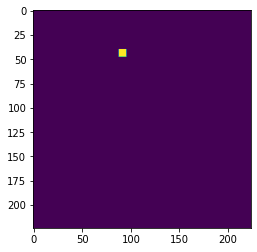

In [272]:
import torch

import lrp.plot
from pf.objectives.sort import _patchify

# Delete
torch.manual_seed(0)
perturbation_size = 8
relevance_scores_nchw = torch.rand((1, 224, 224))
# lrp.plot.heatmap(relevance_scores_nchw.squeeze())


class PixelFlippingObjectives:
    r"""Objectives for Pixel-Flipping Algorithm."""

    MORF: str = 'Most Relevant First'


def _sort(patches_nmmpp: torch.Tensor,
          objective: str = PixelFlippingObjectives.MORF) -> torch.Tensor:
    batch_size: int = patches_nmmpp.shape[0]

    # Flatten each patch
    # Notation:
    #   n: batch size
    #   m2: number of patches per image squared. (m2 = m * m)
    #   p2: perturbation/patch size squared. (p2 = p * p)
    patches_nm2p2: torch.Tensor = patches_nmmpp.reshape(batch_size,
                                                        -1,
                                                        perturbation_size * perturbation_size)

    # Sum each patch
    sum_patches_nm2: torch.Tensor = patches_nm2p2.sum(dim=2)

    # Sort patches by their sum
    order_nm2: torch.Tensor = sum_patches_nm2.argsort(descending=True)

    return order_nm2


# 1. Divide tensor into patches
# Notation:
#   p: perturbation_size
#   m: modified width = original width / p. Eg. 224/8 = 28.
#      28 is the number of patches of size 8 in the image.
patches_nmmpp: torch.Tensor = _patchify(
    relevance_scores_nchw, perturbation_size)

print('patches_nmmpp', patches_nmmpp.shape)
unfold_shape = patches_nmmpp.shape

# 2. Sort patches by their sum
order_nm2: torch.Tensor = _sort(patches_nmmpp)

# Playground
patches_nm2p2: torch.Tensor = patches_nmmpp.reshape(1,
                                                    -1,
                                                    perturbation_size * perturbation_size)
print('patches_nm2p2', patches_nm2p2.shape)
# Sum each patch
sum_patches_nm2: torch.Tensor = patches_nm2p2.sum(dim=2)
print('sum_patches_nm2', sum_patches_nm2.shape)
# print('sum_patches_nm2 2828', sum_patches_nm2.reshape(28,28).argsort(descending=True).shape)
# Sort patches by their sum
order_nm2: torch.Tensor = sum_patches_nm2.argsort(descending=True)
print('sum_patches_nm2.sort()[0][0]', sum_patches_nm2.sort(descending=True).values[0][0])
print('order_nm2', order_nm2.shape)
i = order_nm2[0, 0]
print('i', i)
print('max', sum_patches_nm2.max())
print('max', sum_patches_nm2[0,i])
print('max', patches_nm2p2[0,i].sum())
l, k =  numpy.unravel_index(151,(28,28))
print('max', patches_nmmpp[0,l, k].sum())

print('flat patch', patches_nm2p2[0,i].shape)
print('unraveled patch', patches_nm2p2[0,i].view(perturbation_size, perturbation_size).shape)
# img = patches_nmmpp == patches_nm2p2[0,i].view(perturbation_size, perturbation_size)

from torchvision import transforms

img = torch.zeros(224,224)
img = transforms.functional.erase(img=img,
                                                                         i=l*perturbation_size,
                                                                         j=k*perturbation_size,
                                                                         h=perturbation_size,
                                                                         w=perturbation_size,
                                                                         v=True)
plt.imshow(img)
plt.show()

# print('count nonzero', img.count_nonzero())
# plt.imshow(img[0].reshape(224,224))

# 3. Create mask from individual patch

# 5. Return mask

In [290]:
a = _patchify(relevance_scores_nchw[0], perturbation_size)
a.shape

torch.Size([3, 28, 28, 8, 8])

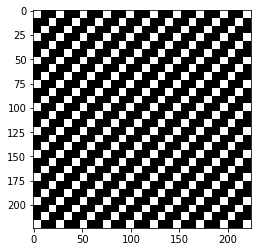

In [277]:
from matplotlib import colors
from torchvision import transforms

# img = torch.zeros(224,224)
img = image_1hw.squeeze()

# plt.imshow(img, cmap='gray')
# plt.colorbar()
# plt.show()

for i in range(0,784):
  l, k =  numpy.unravel_index(i,(28,28))
  if i % 3 != 0:
    continue

  img = transforms.functional.erase(img=img,
                                    # i=l,
                                    # j=k,
                                    i=l*perturbation_size,
                                    j=k*perturbation_size,
                                    h=perturbation_size,
                                    w=perturbation_size,
                                    v=True)

cmap = colors.ListedColormap(['black', 'white'])
bounds=[0,1]
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(img, interpolation='nearest', cmap=cmap, norm=norm)
plt.show()

In [347]:
%load_ext autoreload
%autoreload 2

import pf.objectives.sort

# torch.manual_seed(0)
# perturbation_size = 8
# relevance_scores_nchw = torch.rand((1, 1, 224, 224))


flip_mask_gen = pf.objectives.sort.flip_mask_generator(relevance_scores_nchw=relevance_scores_nchw,
                                                       perturbation_size=perturbation_size)

# mask_n1wh = next(flip_mask_gen)
for mask_n1wh in enumerate(flip_mask_gen):
  # img = mask_n1wh.view(224,224)
  print(mask_n1wh.shape)
  continue

  cmap = colors.ListedColormap(['black', 'white'])
  bounds=[0,1]
  norm = colors.BoundaryNorm(bounds, cmap.N)
  plt.imshow(img, interpolation='nearest', cmap=cmap, norm=norm)
  plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
torch.Size([1, 1, 224, 224])
torch.Size([2, 1, 224, 224])
torch.Size([3, 1, 224, 224])
torch.Size([4, 1, 224, 224])
torch.Size([5, 1, 224, 224])
torch.Size([6, 1, 224, 224])
torch.Size([7, 1, 224, 224])
torch.Size([8, 1, 224, 224])
torch.Size([9, 1, 224, 224])
torch.Size([10, 1, 224, 224])
torch.Size([11, 1, 224, 224])
torch.Size([12, 1, 224, 224])
torch.Size([13, 1, 224, 224])
torch.Size([14, 1, 224, 224])
torch.Size([15, 1, 224, 224])
torch.Size([16, 1, 224, 224])
torch.Size([17, 1, 224, 224])
torch.Size([18, 1, 224, 224])
torch.Size([19, 1, 224, 224])
torch.Size([20, 1, 224, 224])
torch.Size([21, 1, 224, 224])
torch.Size([22, 1, 224, 224])
torch.Size([23, 1, 224, 224])
torch.Size([24, 1, 224, 224])
torch.Size([25, 1, 224, 224])
torch.Size([26, 1, 224, 224])
torch.Size([27, 1, 224, 224])
torch.Size([28, 1, 224, 224])
torch.Size([29, 1, 224, 224])
torch.Size([30, 1, 224, 224])
torch.Size([31, 1, 22

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


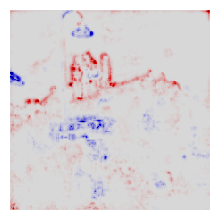

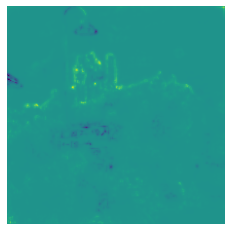

In [283]:
%load_ext autoreload
%autoreload 2

from typing import Callable, Dict, List, Tuple, Union

import numpy
import torch
import torchvision
from matplotlib import pyplot as plt

import lrp.plot
import lrp.rules as rules
from lrp import image
from lrp.core import LRP
from lrp.filter import LayerFilter
from lrp.rules import LrpEpsilonRule, LrpGammaRule, LrpZBoxRule, LrpZeroRule
from lrp.zennit.types import AvgPool, Linear

# Input data
# Image is in RGB mode with range [0,1]
img_bgr_hwc_float_0_1: numpy.array = image.load_img_norm_zero_one('../../data/castle.jpg')
X = lrp.norm.ImageNetNorm.transform(img_bgr_hwc_float_0_1)
# Simulate batch by adding a new dimension
X = torch.unsqueeze(X, 0)

# Model
model = torchvision.models.vgg16(pretrained=True)
model.eval()

# Low and high parameters for zB-rule
batch_size: int = 1
shape: Tuple[int] = (batch_size, 3, 224, 224)

low: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.zeros(*shape))
high: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.ones(*shape))

# Init layer filter
vgg16_target_types: Tuple[type] = (Linear, AvgPool)
filter_by_layer_index_type: LayerFilter = LayerFilter(model)
filter_by_layer_index_type.set_target_types(vgg16_target_types)

name_map: List[Tuple[List[str], rules.LrpRule, Dict[str, Union[torch.Tensor, float]]]]
name_map = [
    (filter_by_layer_index_type(lambda n: n == 0), LrpZBoxRule, {'low': low, 'high': high}),
    (filter_by_layer_index_type(lambda n: 1 <= n <= 16), LrpGammaRule, {'gamma': 0.25}),
    (filter_by_layer_index_type(lambda n: 17 <= n <= 30), LrpEpsilonRule, {'epsilon': 0.25}),
    (filter_by_layer_index_type(lambda n: 31 <= n), LrpZeroRule, {}),
]

lrp_instance: LRP = LRP(model)
lrp_instance.convert_layers(name_map)
R: torch.Tensor = lrp_instance.relevance(X)
relevance_scores_nchw = R.detach()
lrp_instance.heatmap(R, width=2, height=2)

relevance_scores_n1hw = torchvision.transforms.Grayscale()(relevance_scores_nchw)
lrp_instance.heatmap(relevance_scores_n1hw)

In [288]:
relevance_scores_n1hw.aminmax()

torch.return_types.aminmax(
min=tensor(-0.0061),
max=tensor(0.0058))

https://bowenroom.github.io/myBlog/pytorch/fastai2/2020/06/01/torch-unfold.html

In [241]:
import numpy
import torch
import torchvision.transforms
from matplotlib import pyplot as plt

import lrp.plot
from lrp import image

# Input data
# Image is in RGB mode with range [0,1]
img_bgr_hwc_float_0_1: numpy.array = image.load_img_norm_zero_one('../../data/castle.jpg')

image_3hw = lrp.norm.ImageNetNorm.transform(img_bgr_hwc_float_0_1)
image_3hw = lrp.norm.ImageNetNorm.inverse_normalize(image_3hw)

image_1hw = torchvision.transforms.Grayscale()(image_3hw)
image_1hw.shape

torch.Size([1, 224, 224])

In [75]:
kernel_size = 8
stride = kernel_size

import math

print('# patches to expect ', math.floor(image_1hw.shape[1]/kernel_size))

# print(image_1hw.shape)
# print(image_1hw.data.unfold(dimension=1,
#                             size=kernel_size,
#                             step=stride).shape)
patches = image_1hw.data.unfold(dimension=1,
                                size=kernel_size,
                                step=stride).unfold(dimension=2,
                                                    size=kernel_size,
                                                    step=stride)

print(patches.shape)
# https://discuss.pytorch.org/t/patch-making-does-pytorch-have-anything-to-offer/33850/11
unfold_shape = patches.size()
contiguous_patches = patches.contiguous().view(-1, kernel_size, kernel_size)
print(contiguous_patches.shape)

# patches to expect  28
torch.Size([1, 28, 28, 8, 8])
torch.Size([784, 8, 8])


In [74]:
unfold_shape = patches.size()

# Flatten patches
contiguous_patches = patches.contiguous().view(-1, kernel_size, kernel_size)
print('contiguous', contiguous_patches.shape)

print('contiguous flattened', contiguous_patches.flatten(start_dim=1, end_dim=2).sum(dim=1).shape)

order = contiguous_patches.flatten(start_dim=1, end_dim=2).sum(dim=1).argsort(descending=True)
print('order', order.shape)
print('max patch', contiguous_patches.flatten(start_dim=1, end_dim=2).sum(dim=1)[order[0]])

# Convert back to original shape
# contiguous_patches.view_as(patches)

contiguous torch.Size([784, 8, 8])
contiguous flattened torch.Size([784])
order torch.Size([784])
max patch tensor(47.7087)


In [71]:
alt = patches.contiguous().view(-1, kernel_size * kernel_size)
print(alt[0].sum())
print(contiguous_patches.flatten(start_dim=1, end_dim=2).sum(dim=1)[0])

tensor(33.5089)
tensor(33.5089)


In [63]:
# image_dim: int = image_1hw.size(dim=0) 
# image_dim / kernel_size = 784
i: torch.Tensor = torch.arange(784)
for c in contiguous_patches[i, :, :]:
    print(c.sum())
    break

tensor(33.5089)


In [220]:
# image_1hw.data.unfold(dimension=1,
#                                 size=kernel_size)
from torch.nn import functional as f

windows = f.unfold(image_1hw.unsqueeze(0), kernel_size=(8,8), stride=(8,8))
print(windows.shape)

torch.Size([1, 64, 784])


In [ ]:
for i, p in enumerate(patches):
  print(i)

In [208]:
fold = torch.nn.Fold(output_size=(224, 224), kernel_size=kernel_size, stride=stride)
fold(patches).shape

RuntimeError: Expected size of input's dimension 1 to be divisible by the product of kernel_size, but got input.size(1)=8 and kernel_size=(8, 8).

In [202]:
# patches = patches.contiguous().view(1, 1, -1, kernel_size*kernel_size)
print(patches.shape)
# patches = patches.permute(0, 1, 3, 2)
patches = patches.contiguous().view(1, kernel_size*kernel_size, -1)
fold = torch.nn.Fold(output_size=(224, 224), kernel_size=kernel_size, stride=stride)
img = fold(patches)
img = img.squeeze()
print(img.shape)

torch.Size([784, 8, 8])
torch.Size([224, 224])


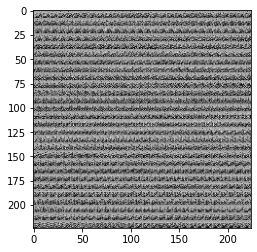

In [198]:
# image_1hw.shape
# img = patches.reshape(*image_1hw.shape[1::])
plt.imshow(img.numpy(), cmap='gray')

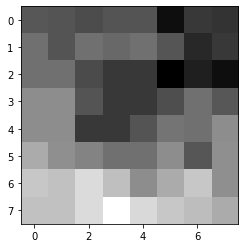

In [126]:
img = patches[1]
plt.imshow(img.numpy(), cmap='gray')

In [106]:
unfold_shape = list(patches.shape)
print(unfold_shape)

torch.from_numpy(numpy.arange(0,unfold_shape[1]))
patches[:,torch.from_numpy(numpy.arange(0,unfold_shape[1])),:,:,:,:].shape

x = patches[:,torch.from_numpy(numpy.arange(0,unfold_shape[1])),:,:,:,:].split(1, dim=1)
x = patches.split(1, dim=1)
# x = patches.split(1, dim=2)

print(len(x))
print(x[0].shape)
print(x[1].shape)

[1, 28, 28, 8, 8]


IndexError: too many indices for tensor of dimension 5

torch.Size([1, 8, 8])


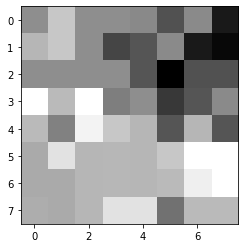

torch.Size([1, 8, 8])


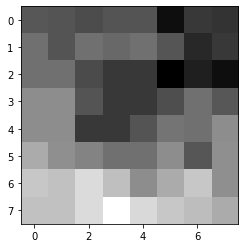

In [66]:
stop_counter: int = 2
counter: int = 0

x = patches[:,torch.from_numpy(numpy.arange(0,unfold_shape[1])),:,:,:,:].split(1, dim=1)
for i in list(numpy.arange(a[1])):
    y =  x[i][:,:,torch.from_numpy(numpy.arange(0,unfold_shape[2])),:,:,:].split(1, dim=2)
    for j in list(numpy.arange(unfold_shape[2])):
        img: torch.Tensor = y[j].squeeze(0).squeeze(0).squeeze(0)
        print(img.shape)
        plt.imshow(img.numpy().transpose((1, 2, 0)), cmap='gray')
        plt.show()
        # lrp.plot.plot_tensor_img_nchw_rgb(img.unsqueeze(0))

        counter += 1

        if counter >= stop_counter:
            break

    if counter >= stop_counter:
        break